# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [54]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 71.1MB/s]


Начнем с необходимых приготовлений.

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [56]:
coins = pd.read_csv("coins.csv")
coins.set_index("date", inplace=True)

Посмотрим что получилось

In [57]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [58]:
coins["name"].nunique()

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [59]:
f'Данные взяты с {coins.index.min()} по {coins.index.max()}'

'Данные взяты с 2013-04-28 по 2018-06-06'

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [60]:
coins.isnull().values.any(), coins.isnull().sum().sum()

(True, 5197)

Хм, NaN довольно много. Давайте найдем колонку, где их больше всего.

In [61]:
max_len = len("activeAddresses")
for col in coins.columns:
  print(col.rjust(max_len), "|", coins[col].isnull().sum())

          price | 327
        txCount | 1520
       txVolume | 1830
activeAddresses | 1520
         symbol | 0
           name | 0
           open | 0
           high | 0
            low | 0
          close | 0
         volume | 0
         market | 0


Как видим, больше всего NaN значений в *txVolume*. На второе же место претендуют сразу *txCount* и  *activeAddresses*. Вероятно, это связано с тем, что в определенные даты валюту никто не покупал, но ее цена на рынке, например, менялась. Поэтому в последних 8 колонках остаются значения. Но это лишь предположение)

Не знаю, нормально ли, что на бирже есть определенная валюта, но ее никто не покупает.

А может вообще это непубличная информация. ¯\\_(ツ)_/¯

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [62]:
coins.loc[coins["price"] == coins["price"].max(), ["name", "price"]]

,name,price
date,,
2017-12-17,Bitcoin,19475.8


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Самая высокая капитализация у Bitcoin -- 30782136351.02.
Самая низкая у KingN Coin -- 41600.98



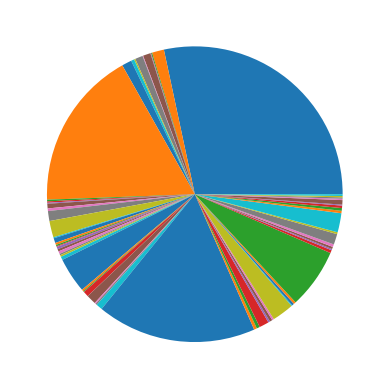

In [63]:
plt.style.use("default")

currencies = coins["name"].unique()
capitalization = dict()
for coin in currencies:
  capitalization[coin] = coins[coins["name"] == coin]["market"].mean()

top = max(capitalization, key=capitalization.get)
loser = min(capitalization, key=capitalization.get)

print(f"Самая высокая капитализация у {top} -- {capitalization[top]:.2f}.\n\
Самая низкая у {loser} -- {capitalization[loser]:.2f}\n")

plt.pie(
    capitalization.values()
)

plt.show()

Часть про pie chart так и не понял, ибо если строить для всех капитализаций, как сделал я, то не вмещаются названия, да их и так очень много. А если для отношения двух капитализаций, то биткоин на диаграмме *поглащает* другую валюту, что делает график в крайней степени неинформативным. В работе оставил самый адекватный вариант, по моему мнению.

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [64]:
# install if necessary
!pip install mplfinance

In [65]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from datetime import datetime

def plot_fancy_price_action(coins, symbol, start_date, end_date):
  plt.style.use("dark_background")

  for_graph = coins.reset_index().copy()
  for_graph["date"] = pd.to_datetime(for_graph["date"])

  for_graph = for_graph.loc[(for_graph["symbol"] == symbol) & (start_date <= for_graph["date"]) & (for_graph["date"] <= end_date), ["date", "open", "high", "low", "close"]]
  for_graph["date"] = for_graph["date"].apply(mdates.date2num)

  fig, ax = plt.subplots(figsize=(17, 5))
  ax.grid(True)
  candlestick_ohlc(ax, for_graph.values, width=.7, colorup="#53c156", colordown="#ff1717")

  locator = mdates.AutoDateLocator()
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
  plt.xticks(rotation=10)


  plt.xlabel("Date", fontweight="bold")
  plt.ylabel("Price", fontweight="bold")
  plt.title(f"Candlestick chart for {symbol}")
  plt.show()

Посмотрим, что получилось:

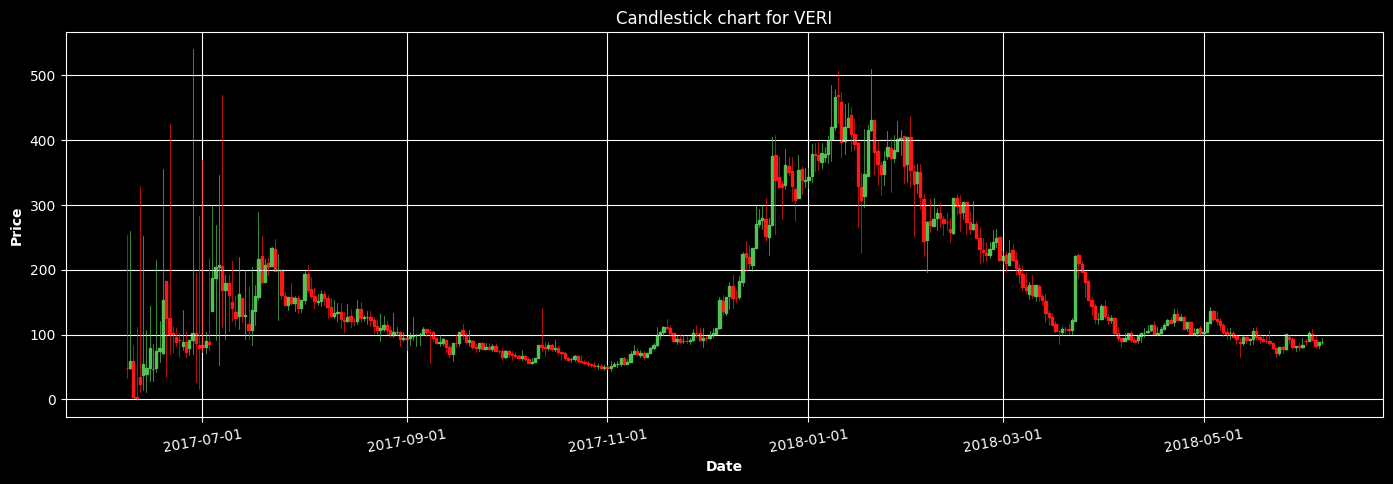

In [66]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [67]:
def calculate_pnd(coins):
  coins["pnd"] = coins["high"] / coins[["open", "close"]].max(axis=1)

def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
  suitable_dates = coins[start_date:end_date].copy()
  suitable_dates = suitable_dates.loc[suitable_dates["symbol"] == symbol, "pnd"]
  if not suitable_dates.empty:
    return suitable_dates.idxmax(), suitable_dates.max()
  else:
    np.nan

calculate_pnd(coins)

In [68]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [69]:
coin_pnd = dict()
currencies = coins["symbol"].unique()
for coin in currencies:
  coin_pnd[coin] = find_most_severe_pump_and_dump(coins, symbol=coin, start_date='2017-06-01', end_date='2018-06-01')
max_value = max(coin_pnd, key=lambda coin: coin_pnd[coin][1])
min_value = min(coin_pnd, key=lambda coin: coin_pnd[coin][1])
print(f"Монета с самым высоким pnd -- {max_value}, {coin_pnd[max_value]}")
print(f"Монета с самым низким pnd -- {min_value}, {coin_pnd[min_value]}")
print(f"Средний pnd по больнице -- {np.array([cost[1] for cost in coin_pnd.values()]).mean()}")

Монета с самым высоким pnd -- VERI, ('2017-06-11', 33.549253731343285)
Монета с самым низким pnd -- USDT, ('2017-11-12', 1.099009900990099)
Средний pnd по больнице -- 2.507501559743181


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [70]:
def compute_roi(coins, investments, start_date, end_date):
  portfolio_start = portfolio_end = 0
  for symbol, invest in investments.items():
    initial_cost = coins.loc[start_date]
    portfolio_start += initial_cost[initial_cost["symbol"] == symbol]["price"].iloc[0] * invest

    final_cost = coins.loc[end_date]
    portfolio_end += final_cost[final_cost["symbol"] == symbol]["price"].iloc[0] * invest
  roi = (portfolio_end - portfolio_start) / portfolio_start
  return roi

In [71]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [72]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [73]:
def plot_bollinger_bands(coins, symbol, window, width):
  selected_coin = coins[coins["symbol"] == symbol].copy()

  selected_coin["MA"] = selected_coin["price"].rolling(window=window).mean()
  selected_coin["std_dev"] = selected_coin["price"].rolling(window=window).std()
  selected_coin["upperBB"] = selected_coin["MA"] + selected_coin["std_dev"] * width
  selected_coin["lowerBB"] = selected_coin["MA"] - selected_coin["std_dev"] * width

  plt.figure(figsize=(17, 5))
  selected_coin.index = pd.to_datetime(selected_coin.index)
  plt.plot(selected_coin.index, selected_coin["price"], label="Цена", color="white")
  plt.plot(selected_coin.index, selected_coin["MA"], label="Скользящее среднее", color="#00bfff", linestyle="--")
  plt.plot(selected_coin.index, selected_coin["upperBB"], label="Верхняя граница Боллинджера", color="#53c156", linestyle="--")
  plt.plot(selected_coin.index, selected_coin["lowerBB"], label="Нижняя граница Боллинджера", color="#ff1717", linestyle="--")

  plt.title(f"Graph for {symbol}")
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.legend(loc="best")
  plt.grid(True)
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

  plt.show()

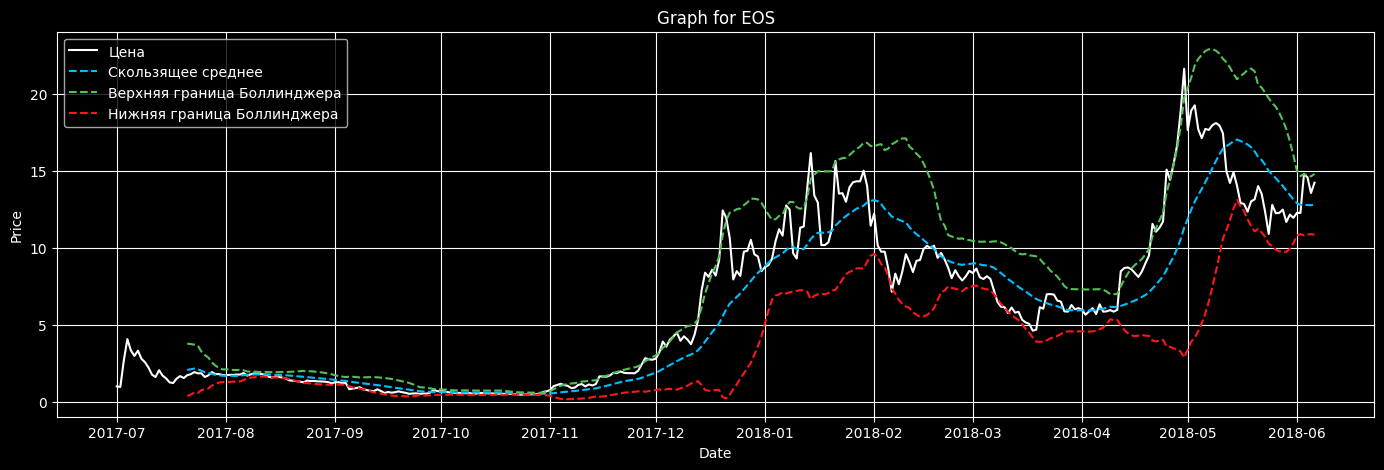

In [74]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Да, выполняется, но с незначительными девиациями. Но, как я писал почти во всех лабораторных по физике в школе, мы живем в реальном мире, и в силу его несовершенства, сухая математика не всегда красиво сходится к жизни. Но в целом пойдет 😃

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

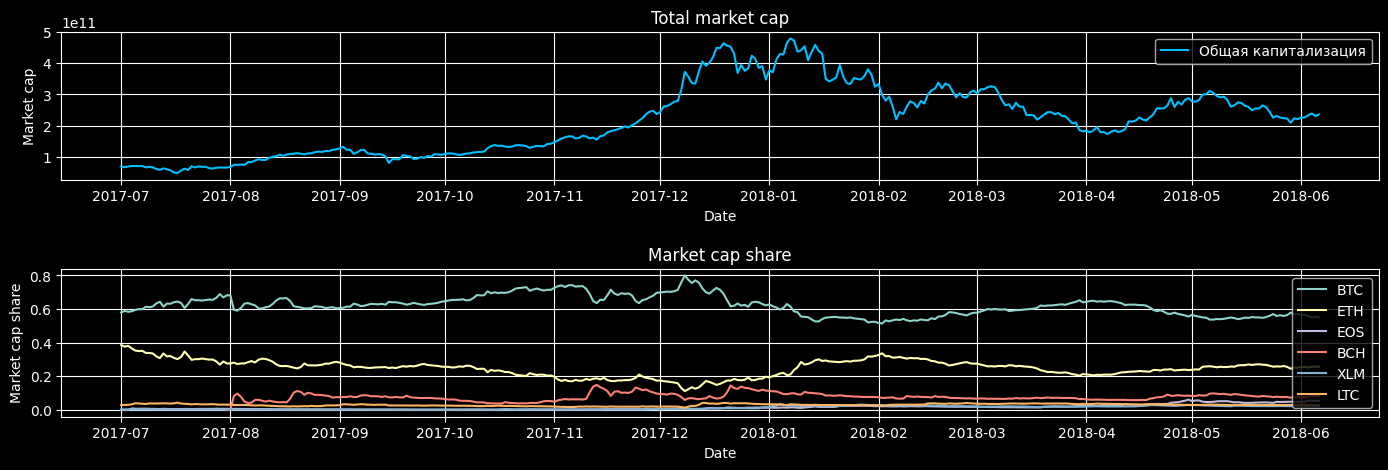

In [75]:
def plot_coins_capitalizations(coins, symbols, start_date):
  filtered_coins = coins.loc[start_date:]
  filtered_coins.index = pd.to_datetime(filtered_coins.index)
  selected_coins = filtered_coins[filtered_coins["symbol"].isin(symbols)]
  total_market_cap = selected_coins.groupby("date")["market"].sum()

  selected_coins = selected_coins.reset_index()
  coins_market_caps = selected_coins.pivot_table(index="date", columns="symbol", values="market")
  coins_market_cap_share = coins_market_caps.div(total_market_cap, axis=0)

  plt.figure(figsize=(17, 5))

  plt.subplot(2, 1, 1)
  plt.plot(total_market_cap.index, total_market_cap.values, label="Общая капитализация", color="#00bfff")
  plt.title("Total market cap")
  plt.xlabel("Date")
  plt.ylabel("Market cap")
  plt.legend()
  plt.grid(True)
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

  plt.subplots_adjust(hspace=0.6)

  plt.subplot(2, 1, 2)
  for symbol in symbols:
      plt.plot(coins_market_cap_share.index, coins_market_cap_share[symbol], label=symbol)
  plt.title("Market cap share")
  plt.xlabel("Date")
  plt.ylabel("Market cap share")
  plt.legend(loc="right")
  plt.grid(True)
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

  plt.show()

plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

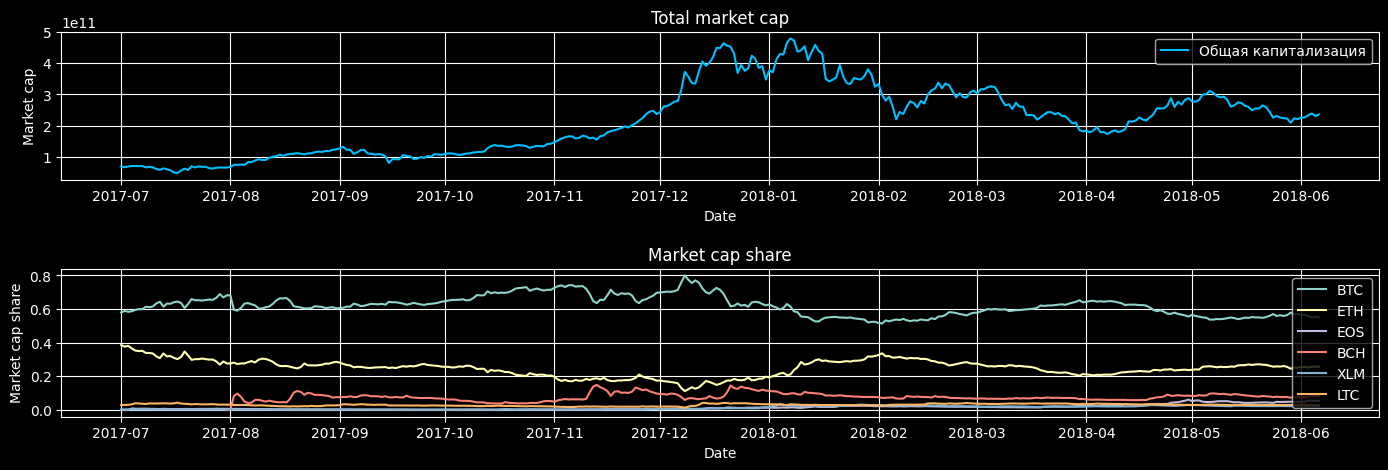

In [76]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Биткоин доминирует, очевидно. Его доля капитализации стабильно высокая, так как именно он "задает тренды". Btc всё же первая и самая известная крипта.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [77]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
  filtered_coins = coins.loc[:date]
  filtered_coins = filtered_coins[filtered_coins["symbol"].isin(symbols)]
  correlations = pd.DataFrame(index=symbols, columns=symbols)
  for first_coin in symbols:
    for second_coin in symbols:
      first_coin_data = filtered_coins[filtered_coins["symbol"] == first_coin]["market"]
      second_coin_data = filtered_coins[filtered_coins["symbol"] == second_coin]["market"]

      # Так как я не нашел формулы "среднего сглаженного", то буду считать, что
      # веса инкрементируются в степенях коэффициента
      moving_average = lambda x: np.average(x, weights=np.arange(1, len(x) + 1) ** alpha)
      moving_average_first_coin = first_coin_data.rolling(window=window).apply(moving_average)
      moving_average_second_coin = second_coin_data.rolling(window=window).apply(moving_average)

      correlations.loc[first_coin, second_coin] = moving_average_first_coin.corr(moving_average_second_coin)

  return correlations

In [78]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-78-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.93,0.52,0.94,0.85,0.97,0.69
ETH,0.93,1.00,0.73,0.78,0.94,0.96,0.93
EOS,0.52,0.73,1.00,0.51,0.84,0.65,0.49
BCH,0.94,0.78,0.51,1.00,0.71,0.88,0.80
XLM,0.85,0.94,0.84,0.71,1.00,0.91,0.90
LTC,0.97,0.96,0.65,0.88,0.91,1.00,0.81
ADA,0.69,0.93,0.49,0.80,0.90,0.81,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [79]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-79-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.91,0.91,0.93,0.92,0.97,0.94
ETH,0.91,1.00,0.92,0.93,0.78,0.92,0.96
EOS,0.91,0.92,1.00,0.92,0.98,0.97,0.98
BCH,0.93,0.93,0.92,1.00,0.89,0.86,0.81
XLM,0.92,0.78,0.98,0.89,1.00,0.94,0.99
LTC,0.97,0.92,0.97,0.86,0.94,1.00,0.99
ADA,0.94,0.96,0.98,0.81,0.99,0.99,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

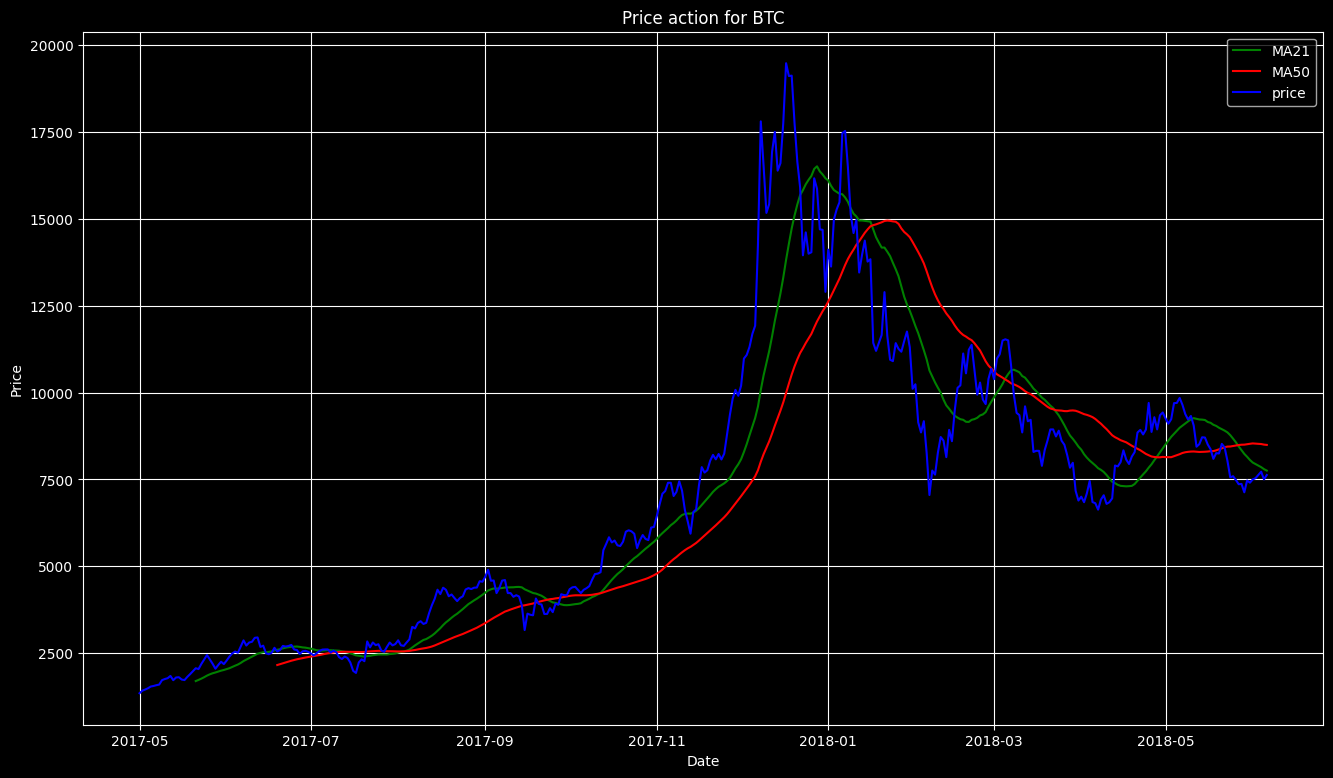

In [85]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coins.index = pd.to_datetime(coins.index)
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [83]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    coins.index = pd.to_datetime(coins.index)
    symbol_data = coins[coins["symbol"] == symbol][start_date:end_date].copy()

    symbol_data.loc[:, "leadMA"] = symbol_data["close"].rolling(window=lead_window).mean()
    symbol_data.loc[:, "lagMA"] = symbol_data["close"].rolling(window=lag_window).mean()
    symbol_data.loc[:, "multiplier"] = symbol_data["close"] / symbol_data["close"].shift(1)
    symbol_data.loc[symbol_data.index[0], "multiplier"] = 1

    hold_portfolio = strategy_portfolio = 1
    hold_values = [hold_portfolio]
    strategy_values = [strategy_portfolio]

    for i in range(1, len(symbol_data)):
        hold_portfolio *= symbol_data.iloc[i]["multiplier"]
        hold_values.append(hold_portfolio)

        if symbol_data.iloc[i]["leadMA"] - symbol_data.iloc[i]["lagMA"] > threshold * symbol_data.iloc[i]["close"]:
            strategy_portfolio *= symbol_data.iloc[i]["multiplier"]
        strategy_values.append(strategy_portfolio)

    symbol_data.loc[:, "hold"] = hold_values
    symbol_data.loc[:, "MA"] = strategy_values

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

    ax1.plot(symbol_data.index, symbol_data["close"], label="Цена на момент закрытия")
    ax1.plot(symbol_data.index, symbol_data["leadMA"], label=f"Точное MA ({lead_window})")
    ax1.plot(symbol_data.index, symbol_data["lagMA"], label=f"Отстающее MA ({lag_window})")
    ax1.set_title(f"Moving Averages for {symbol}")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Price")
    ax1.legend(loc="best")
    ax1.grid(True)

    ax2.plot(symbol_data.index, symbol_data["hold"], label="Hold")
    ax2.plot(symbol_data.index, symbol_data["MA"], label="MA")
    ax2.set_title(f"Hold vs MA for {symbol}")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Growth Multiplier")
    ax2.legend(loc="best")
    plt.grid(True)

    plt.show()

In [84]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

На примере BTC видно, что на подъеме стратегия работает значительно хуже (доминируется банальной закупкой в начале).

Возможно, это так, потому что параметры стратегии могут быть подобраны не корректно (я на рандом тыкал, иногда результаты лучше).

Однако на спадах показывает себя лучше: отчетливо видно, если проставить дату за 17-18 годы.

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.